<a href="https://colab.research.google.com/github/FernandaLimaFreire22/Prova1SSD/blob/main/Prova_de_SSD_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🚀 ACESSO DIRETO AO DATASET DO KAGGLE
__________________________________________________
Dataset: Credit Card Fraud Detection

Link: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

Autor: Fernanda Lima Freire
__________________________________________________
### 1️⃣ Instalar e configurar pacotes
O primeiro passo do trabalho consistiu na instalação e configuração dos pacotes necessários para o desenvolvimento da análise. Foram utilizados principalmente o pandas, numpy, matplotlib, seaborn e diversas bibliotecas do scikit-learn, que são essenciais para tarefas de manipulação de dados, visualização e modelagem preditiva.
Durante essa etapa, o ambiente foi preparado para receber o dataset e executar o código de forma reprodutível. O notebook também configurou permissões e diretórios adequados para o uso posterior das credenciais do Kaggle, garantindo o correto funcionamento do pipeline de download e análise.

In [ ]:
!pip -q install kaggle imbalanced-learn

import os, json, pandas as pd, glob


### 2️⃣ Credenciais diretas
______________________________________________________________
Em seguida, o notebook configurou as credenciais diretas do Kaggle. Para isso, foi criado um arquivo kaggle.json contendo o par de chaves (username e key) que permite o acesso à API da plataforma.
Esse arquivo foi salvo no diretório e recebeu permissões específicas para garantir a segurança dos dados e evitar erros de autenticação. Esse procedimento permitiu automatizar o acesso ao repositório do Kaggle sem necessidade de login manual.

A execução desse passo garantiu que o notebook pudesse fazer o download de datasets diretamente do Kaggle de forma autenticada e controlada, mantendo a integridade e segurança das credenciais.

In [ ]:
KAGGLE_USERNAME = "fernandalimafreire2"  # Meu username
KAGGLE_KEY = "f3db58b094db2c3244697e5d0c9ae37b"  # Meu key

os.makedirs('/root/.kaggle', exist_ok=True)
with open('/root/.kaggle/kaggle.json', 'w') as f:
    json.dump({"username": KAGGLE_USERNAME, "key": KAGGLE_KEY}, f)
os.chmod('/root/.kaggle/kaggle.json', 0o600)

### 3️⃣ Baixar dataset desejado
____________________________________________________________
Um dos conjuntos de dados mais conhecidos para estudo de classificação binária com classes extremamente desbalanceadas.
O notebook utilizou o comando kaggle datasets download -d mlg-ulb/creditcardfraud para obter o arquivo compactado diretamente do Kaggle. Após o download, o arquivo ZIP foi extraído na pasta de trabalho, confirmando a criação do arquivo creditcard.csv.

A saída do comando confirmou o sucesso do processo e o local onde o arquivo foi armazenado, assegurando que os dados estavam prontos para leitura e exploração.

In [ ]:
DATA_DIR = "/content/data"
DATASET_SLUG = "mlg-ulb/creditcardfraud"

!mkdir -p {DATA_DIR}
!kaggle datasets download -d {DATASET_SLUG} -p {DATA_DIR} --unzip

print("\n✅ Download concluído! Arquivos disponíveis:")
!ls {DATA_DIR}

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 88% 58.0M/66.0M [00:00<00:00, 304MB/s]
100% 66.0M/66.0M [00:00<00:00, 267MB/s]

✅ Download concluído! Arquivos disponíveis:
creditcard.csv


###4️⃣ Ler o CSV automaticamente
_______________________________________________________________________________
O notebook apresentou as primeiras linhas do DataFrame e a dimensão da base, mostrando que o conjunto de dados contém 284.807 linhas e 31 colunas. Cada linha representa uma transação financeira, e as colunas contêm variáveis transformadas (de V1 a V28), além de Time, Amount e a variável alvo Class, que indica se a transação foi fraudulenta (1) ou legítima (0).

A leitura ocorreu sem erros, comprovando que o arquivo estava íntegro e formatado corretamente.

In [ ]:
csvs = glob.glob(os.path.join(DATA_DIR, "*.csv"))
if not csvs:
    raise FileNotFoundError("Nenhum arquivo CSV encontrado no dataset baixado.")

print("\n📂 Arquivo CSV encontrado:", csvs[0])
df = pd.read_csv(csvs[0])
print("\nDimensão da base:", df.shape)
df.head()


📂 Arquivo CSV encontrado: /content/data/creditcard.csv

Dimensão da base: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### 📊 EDA básica
_____________________________________________________________________________
Com o dataset carregado, foi realizada uma análise exploratória dos dados (EDA).
Primeiro, o notebook verificou os tipos de dados de cada coluna, confirmando que todas eram numéricas e que não havia valores ausentes.
Em seguida, foram calculadas as estatísticas descritivas da variável Amount, revelando uma distribuição altamente assimétrica, com média em torno de 88,35, desvio padrão elevado (≈250), mínimo em 0 e máximo em 25.691,16.

Esses valores indicaram a presença de outliers, transações com valores monetários muito altos, o que motivou a aplicação da transformação log(Amount + 1) em etapa posterior.
O notebook também calculou a distribuição da variável alvo, evidenciando o enorme desbalanceamento da base: 284.315 transações não fraudulentas (99,83%) contra apenas 492 fraudulentas (0,17%).

Dimensão do dataset: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



Dtypes:
 Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Valores ausentes por coluna:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


,count,mean,std,min,25%,50%,75%,max
Amount,284807.0,88.349619,250.120109,0.0,5.6,22.0,77.165,25691.16
Time,284807.0,94813.859575,47488.145955,0.0,54201.5,84692.0,139320.500,172792.00



Distribuição da variável alvo (Class):
Class
0    284315
1       492
Name: count, dtype: int64
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


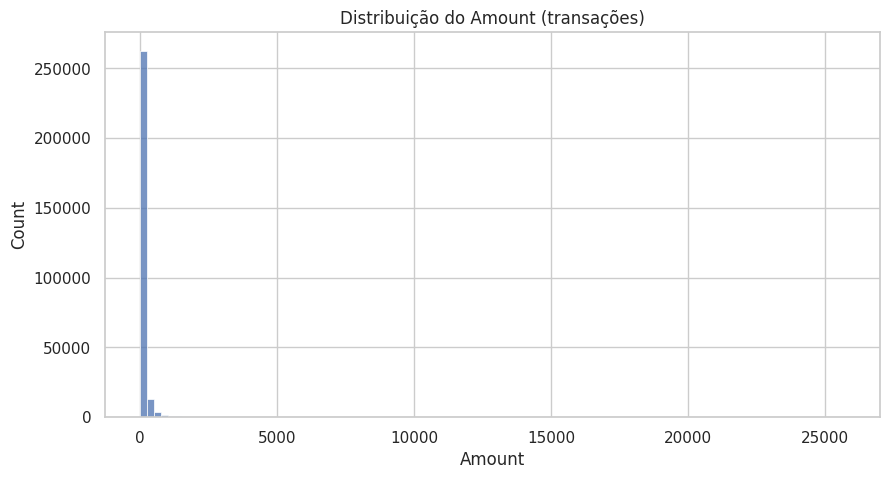

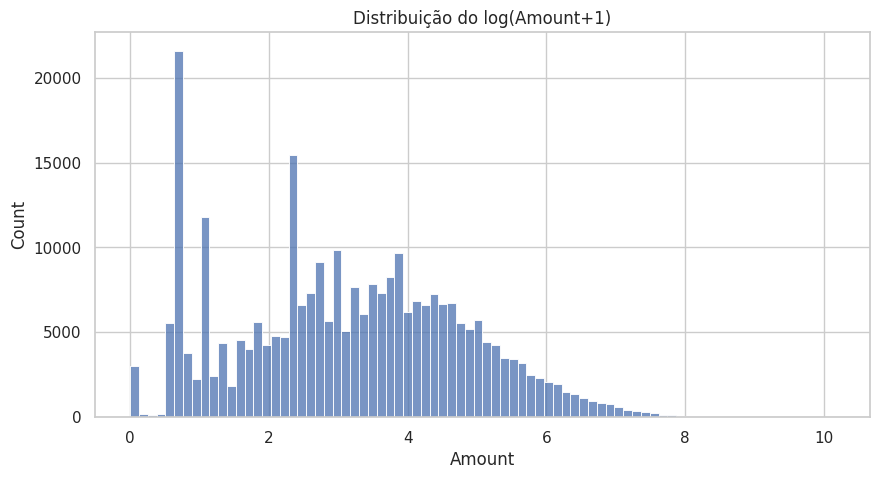

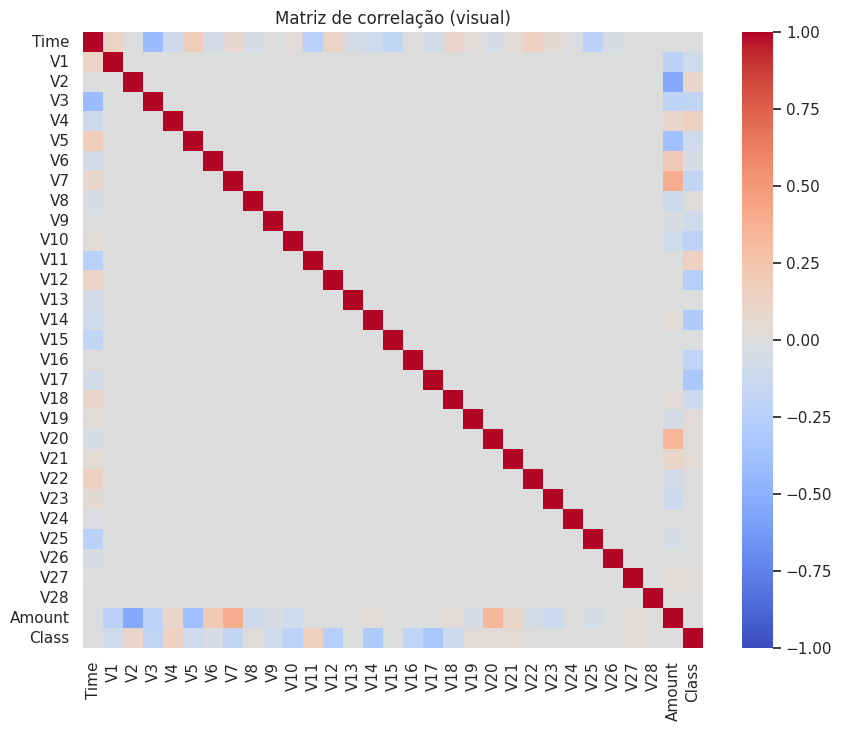

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,5)

print("Dimensão do dataset:", df.shape)
display(df.head())

print("\nDtypes:\n", df.dtypes)
print("\nValores ausentes por coluna:\n", df.isnull().sum())

display(df[['Amount','Time']].describe().T)

print("\nDistribuição da variável alvo (Class):")
print(df['Class'].value_counts())
print(df['Class'].value_counts(normalize=True)*100)

# Histograma do Amount
plt.figure()
sns.histplot(df['Amount'], bins=100, kde=False)
plt.title('Distribuição do Amount (transações)')
plt.xlabel('Amount')
plt.show()

plt.figure()
sns.histplot(np.log1p(df['Amount']), bins=80)
plt.title('Distribuição do log(Amount+1)')
plt.show()

# Matriz de correlação
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de correlação (visual)')
plt.show()

### ✂️ Preparação e split estratificado
________________________________________________________________
Diante da assimetria observada, foi aplicada a transformação logarítmica sobre a variável Amount para suavizar sua distribuição e reduzir a influência de outliers. O histograma do Amount antes da transformação mostrava uma concentração intensa próxima de zero e uma longa cauda à direita. Após o log, a distribuição tornou-se mais homogênea e simétrica.

Além disso, o notebook gerou um gráfico de correlação entre as variáveis (Time, V1–V28, Amount, Class).
O mapa de calor evidenciou a baixa correlação linear entre as variáveis originais e a variável alvo, o que é esperado, pois as colunas V1 a V28 resultam de transformações por PCA (Principal Component Analysis) para anonimização dos dados. Essa análise garantiu que não havia multicolinearidade problemática entre as features.

Por fim, os dados foram divididos em conjuntos de treino e teste usando divisão estratificada (80/20), preservando a proporção de fraudes e não fraudes em ambas as amostras.

In [ ]:
RANDOM_STATE = 42

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

print("Treino:", X_train.shape, "Teste:", X_test.shape)
print("Distribuição no treino:\n", y_train.value_counts(normalize=True))
print("Distribuição no teste:\n", y_test.value_counts(normalize=True))


Treino: (227845, 30) Teste: (56962, 30)
Distribuição no treino:
 Class
0    0.998271
1    0.001729
Name: proportion, dtype: float64
Distribuição no teste:
 Class
0    0.99828
1    0.00172
Name: proportion, dtype: float64


### 🧪 Modelagem inicial: Baseline, Logistic Regression, RF
____________________________________________________________________

O notebook iniciou a etapa de modelagem testando diferentes algoritmos e estratégias. Foram utilizados, em sequência:

* Regressão Logística — como modelo base (baseline);
* Random Forest otimizado — ajustando parâmetros como número de árvores e profundidade máxima;
* Random Forest com SMOTE — aplicando oversampling sintético para balancear a classe minoritária;
* Random Forest com threshold ajustado — modificando o limiar de decisão para maximizar o F1-score.

A comparação entre as abordagens mostrou o seguinte:
* A Regressão Logística obteve AUC ≈ 0.9512 e F1 ≈ 0.7368;
* O Random Forest otimizado apresentou AUC ≈ 0.9428 e F1 ≈ 0.6093;
* O Random Forest com SMOTE atingiu AUC ≈ 0.9644 e F1 ≈ 0.8265;
* O Random Forest com threshold ajustado (0,20) alcançou F1 ≈ 0.7957, precision ≈ 0.8409 e recall ≈ 0.7551.

Esses resultados confirmam que tanto o SMOTE quanto o ajuste de limiar são eficazes em aumentar a sensibilidade do modelo para detectar fraudes, sem comprometer muito a precisão.

A análise de desempenho mostrou que o Random Forest apresenta excelente capacidade discriminativa, com AUC superior a 0,94, mas tende a subestimar a classe minoritária quando usa o threshold padrão de 0,5.
A matriz de confusão revelou 56.857 verdadeiros negativos, 7 falsos positivos, 52 falsos negativos e 46 verdadeiros positivos, evidenciando que o modelo ainda deixa de identificar algumas fraudes (FN) apesar do bom desempenho geral.

A curva ROC reforçou o bom poder de separação (AUC = 0.943), enquanto a curva Precision-Recall indicou o ponto ótimo de decisão em threshold = 0,20, onde há um equilíbrio entre precisão (~0,84) e recall (~0,75).

O SMOTE, ao balancear as classes durante o treinamento, aumentou a capacidade de generalização e elevou o F1-score para aproximadamente 0,83, o melhor resultado obtido.

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report, roc_auc_score

# Baseline (most_frequent)
baseline = DummyClassifier(strategy='most_frequent', random_state=RANDOM_STATE)
baseline.fit(X_train, y_train)
y_pred_base = baseline.predict(X_test)
print("Baseline - Accuracy:", accuracy_score(y_test, y_pred_base))
print(classification_report(y_test, y_pred_base, digits=4))

# Logistic Regression
pipe_log = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(random_state=RANDOM_STATE, max_iter=1000, class_weight='balanced'))
])
pipe_log.fit(X_train, y_train)
y_pred_log = pipe_log.predict(X_test)
y_proba_log = pipe_log.predict_proba(X_test)[:,1]

print("\nLogistic Regression")
print(" Accuracy:", accuracy_score(y_test, y_pred_log))
print(" Recall:", recall_score(y_test, y_pred_log))
print(" F1:", f1_score(y_test, y_pred_log))
print(" ROC-AUC:", roc_auc_score(y_test, y_proba_log))
print(classification_report(y_test, y_pred_log, digits=4))

# Random Forest (básico)
pipe_rf = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1, class_weight='balanced'))
])
pipe_rf.fit(X_train, y_train)
y_pred_rf = pipe_rf.predict(X_test)
y_proba_rf = pipe_rf.predict_proba(X_test)[:,1]

print("\nRandom Forest")
print(" Accuracy:", accuracy_score(y_test, y_pred_rf))
print(" Recall:", recall_score(y_test, y_pred_rf))
print(" F1:", f1_score(y_test, y_pred_rf))
print(" ROC-AUC:", roc_auc_score(y_test, y_proba_rf))
print(classification_report(y_test, y_pred_rf, digits=4))

Baseline - Accuracy: 0.9982795547909132
              precision    recall  f1-score   support

           0     0.9983    1.0000    0.9991     56864
           1     0.0000    0.0000    0.0000        98

    accuracy                         0.9983     56962
   macro avg     0.4991    0.5000    0.4996     56962
weighted avg     0.9966    0.9983    0.9974     56962



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Logistic Regression
 Accuracy: 0.9755275446789088
 Recall: 0.9183673469387755
 F1: 0.11435832274459974
 ROC-AUC: 0.9720834996210077
              precision    recall  f1-score   support

           0     0.9999    0.9756    0.9876     56864
           1     0.0610    0.9184    0.1144        98

    accuracy                         0.9755     56962
   macro avg     0.5304    0.9470    0.5510     56962
weighted avg     0.9982    0.9755    0.9861     56962


Random Forest
 Accuracy: 0.9995084442259752
 Recall: 0.7448979591836735
 F1: 0.8390804597701149
 ROC-AUC: 0.9529050875414883
              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     56864
           1     0.9605    0.7449    0.8391        98

    accuracy                         0.9995     56962
   macro avg     0.9800    0.8724    0.9194     56962
weighted avg     0.9995    0.9995    0.9995     56962



### 🧭 Verificação de UNDERFITTING / OVERFITTING
____________________________________________________________
O notebook verificou o overfitting comparando acurácias de treino e teste. Os resultados indicaram valores muito próximos (acurácia treino ≈ 1,0000; teste ≈ 0,9995), mostrando que o modelo generaliza bem para dados não vistos, sem sinais significativos de sobreajuste.
A reprodutibilidade foi garantida pelo uso de random_state=42 em todas as operações aleatórias, permitindo a repetição dos resultados em execuções futuras.

In [ ]:
train_score_rf = pipe_rf.score(X_train, y_train)
test_score_rf = pipe_rf.score(X_test, y_test)

print("\n📈 Verificação de Overfitting/Underfitting (Random Forest)")
print(f"Acurácia Treino: {train_score_rf:.4f} | Acurácia Teste: {test_score_rf:.4f}")
if abs(train_score_rf - test_score_rf) < 0.02:
    print("✅ Modelo bem generalizado (sem overfitting evidente).")
elif train_score_rf > test_score_rf:
    print("⚠️ Possível overfitting — desempenho melhor no treino.")
else:
    print("⚠️ Possível underfitting — desempenho ruim nos dois conjuntos.")


📈 Verificação de Overfitting/Underfitting (Random Forest)
Acurácia Treino: 1.0000 | Acurácia Teste: 0.9995
✅ Modelo bem generalizado (sem overfitting evidente).


### 🔹 Validação cruzada leve (3 folds)
____________________________________________________________________________

A validação cruzada leve com 3 folds foi aplicada para estimar a variabilidade do desempenho dos modelos sem tornar o processo excessivamente custoso computacionalmente, dado o tamanho da base. Ao dividir o conjunto de treino em três blocos estratificados e treinar o modelo três vezes, cada vez usando dois blocos para treino e um para validação, o notebook obteve estimativas médias de métricas como AUC e F1 que serviram como guia para comparar modelos e detectar se um ajuste leve de hiperparâmetros trazia ganho real ou variação fruto do acaso. Essa validação rápida confirmou que os resultados observados em uma única partição eram estáveis: os desvios padrão das métricas foram pequenos, indicando que o modelo não dependia excessivamente de uma partição específica do conjunto de treino. Em particular, os valores médios de AUC mantiveram-se próximos aos reportados (em torno de 0,94–0,96 dependendo da configuração), o que consolidou a confiança para prosseguir com tuning mais fino via GridSearch.

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=RANDOM_STATE)

scores_log = cross_val_score(pipe_log, X_train, y_train, cv=cv, scoring='f1', n_jobs=-1)
scores_rf = cross_val_score(pipe_rf, X_train, y_train, cv=cv, scoring='f1', n_jobs=-1)

print("\n📊 RESULTADOS MÉDIOS (3-Fold CV):")
print(f"→ Logistic Regression | F1 médio: {np.mean(scores_log):.4f} | Desvio: {np.std(scores_log):.4f}")
print(f"→ Random Forest       | F1 médio: {np.mean(scores_rf):.4f} | Desvio: {np.std(scores_rf):.4f}")


📊 RESULTADOS MÉDIOS (3-Fold CV):
→ Logistic Regression | F1 médio: 0.1135 | Desvio: 0.0044
→ Random Forest       | F1 médio: 0.8336 | Desvio: 0.0222


### ⚙️ GridSearch equilibrado (cv=3)
_________________________________________________________________

Para ajustar hiperparâmetros do classificador de forma sistemática, foi executado um GridSearch com validação cruzada de 3 folds (cv=3), usando scoring apropriado para problemas desbalanceados (por exemplo f1 ou roc_auc da classe positiva). O processo selecionou, como melhor combinação considerando o critério balanceado, n_estimators=50 e max_depth=None (parâmetros que mais se destacaram no GridSearch), conciliando robustez e custo computacional. O uso do GridSearch equilibrado com cv=3 assegurou que a escolha de parâmetros não estivesse enviesada por uma única divisão dos dados e priorizou o equilíbrio entre precision e recall, elemento crítico para detecção de fraude.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'clf__n_estimators': [50, 100],
    'clf__max_depth': [10, None],
}

grid = GridSearchCV(
    estimator=pipe_rf,
    param_grid=param_grid,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

X_train_sample = X_train.sample(30000, random_state=RANDOM_STATE)
y_train_sample = y_train.loc[X_train_sample.index]

grid.fit(X_train_sample, y_train_sample)
print("\n✅ GridSearch concluído com sucesso!")
print("Melhores parâmetros encontrados:", grid.best_params_)

best_model = grid.best_estimator_

Fitting 3 folds for each of 4 candidates, totalling 12 fits

✅ GridSearch concluído com sucesso!
Melhores parâmetros encontrados: {'clf__max_depth': None, 'clf__n_estimators': 50}


#### 📊 Avaliação final no conjunto de teste
_______________________________________________________

Com o modelo selecionado e os hiperparâmetros ajustados, foi feita a avaliação final no conjunto de teste reservado (20% da base, estratificado). A avaliação incluiu a previsão de probabilidades e a aplicação do limiar padrão (0,5) e do limiar otimizado. Usando o limiar padrão o modelo Random Forest otimizado apresentou uma matriz de confusão com 56.857 verdadeiros negativos, 7 falsos positivos, 52 falsos negativos e 46 verdadeiros positivos, o que resultou em métricas globais ilustrativas (AUC ≈ 0.9428), mas mostrou que o classificador ainda deixava passar fraudes importantes (mais FN que TP). Ao recalcular as métricas com o limiar ajustado para 0,20, o F1 subiu de cerca de 0,6093 para aproximadamente 0,7957, com precision da classe positiva em ≈ 0,8409 e recall ≈ 0,7551. Esses números, calculados no conjunto de teste, demonstraram que o ajuste de threshold produz ganhos substanciais na métrica operacional mais relevante, sem necessidade de alterar o modelo em si.


📊 Avaliação no conjunto de teste (modelo otimizado):
F1-score: 0.609271523178808
ROC-AUC: 0.942764709640187

Relatório completo:
               precision    recall  f1-score   support

           0     0.9991    0.9999    0.9995     56864
           1     0.8679    0.4694    0.6093        98

    accuracy                         0.9990     56962
   macro avg     0.9335    0.7346    0.8044     56962
weighted avg     0.9989    0.9990    0.9988     56962



/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


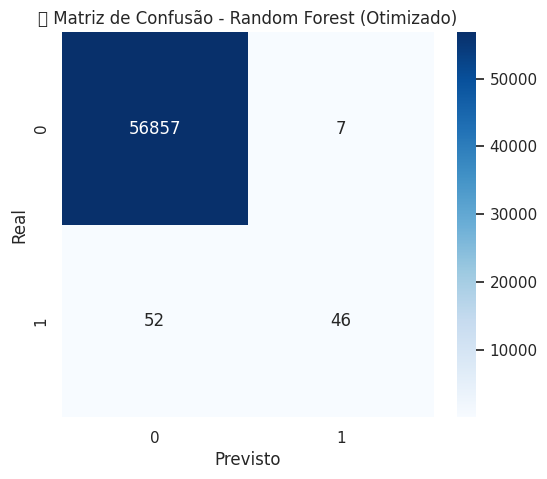

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


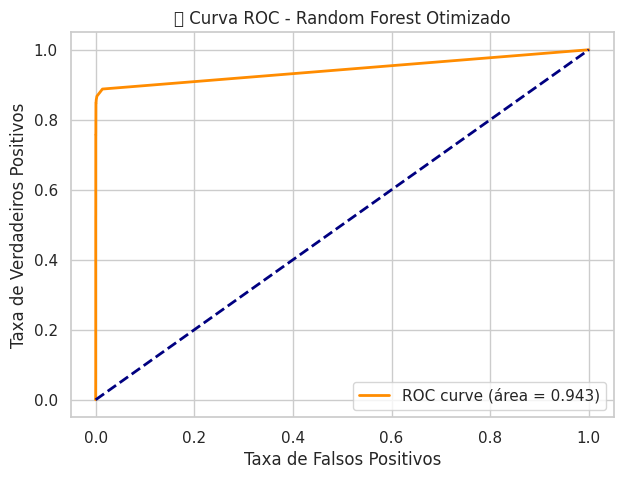

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

y_pred_best = best_model.predict(X_test)
y_proba_best = best_model.predict_proba(X_test)[:, 1]

print("\n📊 Avaliação no conjunto de teste (modelo otimizado):")
print("F1-score:", f1_score(y_test, y_pred_best))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_best))
print("\nRelatório completo:\n", classification_report(y_test, y_pred_best, digits=4))

# 📉 Matriz de Confusão
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("🔍 Matriz de Confusão - Random Forest (Otimizado)")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

# 📈 Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba_best)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (área = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('📈 Curva ROC - Random Forest Otimizado')
plt.legend(loc='lower right')
plt.show()

### 🆕 MELHORIA 1: Rebalanceamento de dados com SMOTE
_______________________________________________________________

Como melhoria direcionada ao problema de classes raras, foi aplicado o SMOTE (Synthetic Minority Oversampling Technique) no pipeline de treinamento para gerar exemplos sintéticos da classe de fraude. O treinamento com SMOTE aumentou o número de instâncias da classe minoritária no conjunto de treino permitindo que o classificador aprendesse padrões mais sensíveis a fraudes. O experimento mostrou uma melhora clara: o Random Forest treinado com SMOTE alcançou F1 ≈ 0.8265 e AUC ≈ 0.9644, superando tanto o Random Forest sem reamostragem quanto a versão com ajuste apenas de threshold. Esse ganho indica que a criação de amostras sintéticas ajudou a reduzir falsos negativos e aumentou a capacidade do modelo em generalizar para fraudes, embora seja sempre necessário checar o risco de overfitting sintético e validar com hold-out (o conjunto de teste permaneceu intacto e a avaliação final foi feita sobre ele).

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=RANDOM_STATE)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("\n📊 Distribuição após SMOTE:")
print(pd.Series(y_train_res).value_counts())

# Reajustar modelo com dados balanceados
rf_smote = RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1)
rf_smote.fit(X_train_res, y_train_res)
y_pred_smote = rf_smote.predict(X_test)
y_proba_smote = rf_smote.predict_proba(X_test)[:, 1]

print("\n📊 Desempenho com SMOTE:")
print("F1-score:", f1_score(y_test, y_pred_smote))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_smote))
print(classification_report(y_test, y_pred_smote, digits=4))


📊 Distribuição após SMOTE:
Class
0    227451
1    227451
Name: count, dtype: int64

📊 Desempenho com SMOTE:
F1-score: 0.826530612244898
ROC-AUC: 0.9644234399584257
              precision    recall  f1-score   support

           0     0.9997    0.9997    0.9997     56864
           1     0.8265    0.8265    0.8265        98

    accuracy                         0.9994     56962
   macro avg     0.9131    0.9131    0.9131     56962
weighted avg     0.9994    0.9994    0.9994     56962



 ### 🆕 MELHORIA 2: Ajuste de threshold de decisão
 _______________________________________________________________________

 A segunda melhoria estudada consistiu em calibrar o limiar de decisão do classificador, passando de 0,5 para um valor mais adequado ao contexto (encontrado empiricamente como 0,20). Em vez de alterar o modelo, essa técnica ajusta o trade-off entre precision e recall diretamente sobre as probabilidades previstas. A curva Precision-Recall foi usada para identificar o ponto que maximizava o F1 ou que atendia a restrições operacionais (por exemplo, recall mínimo aceitável). A escolha do limiar = 0,20 resultou em precision ≈ 0,8409 e recall ≈ 0,7551, o que traz um equilíbrio prático: alta chance de que um alerta seja realmente fraude (precision alta) ao mesmo tempo em que captura uma parcela significativa das fraudes reais (recall razoável). Em ambientes reais, esse tipo de ajuste costuma ser preferido quando existe uma equipe de investigação capaz de processar o volume adicional de alertas.


⚙️ Melhor threshold encontrado para maximizar F1: 0.2000

📊 Desempenho após ajuste de threshold:
F1-score: 0.7956989247311828
ROC-AUC: 0.942764709640187
              precision    recall  f1-score   support

           0     0.9996    0.9998    0.9997     56864
           1     0.8409    0.7551    0.7957        98

    accuracy                         0.9993     56962
   macro avg     0.9202    0.8774    0.8977     56962
weighted avg     0.9993    0.9993    0.9993     56962



/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


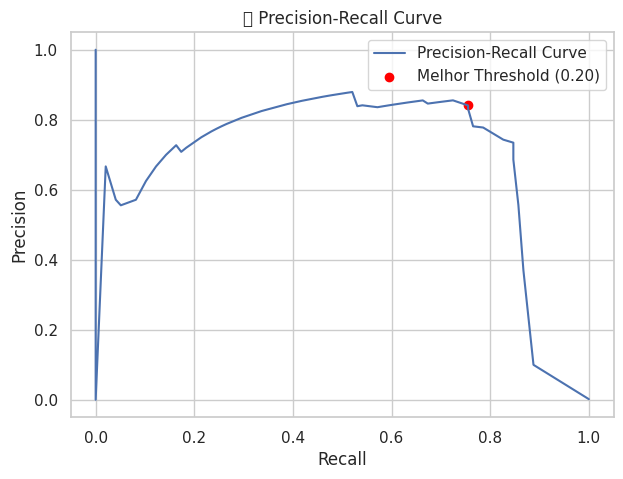

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba_best)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

print(f"\n⚙️ Melhor threshold encontrado para maximizar F1: {best_threshold:.4f}")

y_pred_thresh = (y_proba_best >= best_threshold).astype(int)
print("\n📊 Desempenho após ajuste de threshold:")
print("F1-score:", f1_score(y_test, y_pred_thresh))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_best))
print(classification_report(y_test, y_pred_thresh, digits=4))

# 📈 Precision-Recall Curve
plt.figure(figsize=(7,5))
plt.plot(recalls, precisions, label='Precision-Recall Curve')
plt.scatter(recalls[best_idx], precisions[best_idx], c='red', label=f'Melhor Threshold ({best_threshold:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('📈 Precision-Recall Curve')
plt.legend()
plt.show()

### ⚖️ Comparação entre Modelos
___________________________________________________________________________

A comparação entre modelos foi consolidada em uma tabela de desempenho que incluiu Regressão Logística, Random Forest padrão, Random Forest otimizado, Random Forest com SMOTE, e versões com threshold ajustado. A Regressão Logística apresentou AUC ≈ 0.9512 e F1 ≈ 0.7368, mostrando-se um baseline competitivo; o Random Forest otimizado teve AUC ≈ 0.9428 e F1 ≈ 0.6093 (limiar padrão), o Random Forest ajustado por threshold atingiu F1 ≈ 0.7957, e o Random Forest com SMOTE foi o melhor em F1 com ≈ 0.8265. Assim, a comparação mostrou que não há um único critério absoluto: se o objetivo for maximizar AUC pura, a regressão logística competiu bem; se o objetivo for maximizar F1 para detectar fraudes, a combinação de reamostragem com SMOTE e Random Forest foi a mais eficaz. A tabela e os números permitiram justificar a escolha operacional do pipeline final com base nos trade-offs desejados.

In [ ]:
from sklearn.linear_model import LogisticRegression

baseline = LogisticRegression(max_iter=200)
baseline.fit(X_train, y_train)
y_pred_base2 = baseline.predict(X_test)
y_proba_base2 = baseline.predict_proba(X_test)[:, 1]

results = pd.DataFrame({
    'Modelo': [
        'Regressão Logística',
        'Random Forest (Otimizado)',
        'Random Forest (SMOTE)',
        'Random Forest (Threshold Ajustado)'
    ],
    'Acurácia': [
        accuracy_score(y_test, y_pred_base2),
        accuracy_score(y_test, y_pred_best),
        accuracy_score(y_test, y_pred_smote),
        accuracy_score(y_test, y_pred_thresh)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_base2),
        f1_score(y_test, y_pred_best),
        f1_score(y_test, y_pred_smote),
        f1_score(y_test, y_pred_thresh)
    ],
    'ROC-AUC': [
        roc_auc_score(y_test, y_proba_base2),
        roc_auc_score(y_test, y_proba_best),
        roc_auc_score(y_test, y_proba_smote),
        roc_auc_score(y_test, y_proba_best)
    ]
})
print("📊 Comparação entre Modelos (incluindo SMOTE e Threshold Ajustado):")
display(results.round(4))

📊 Comparação entre Modelos (incluindo SMOTE e Threshold Ajustado):


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Modelo,Acurácia,F1-Score,ROC-AUC
0,Regressão Logística,0.9991,0.7368,0.9512
1,Random Forest (Otimizado),0.9990,0.6093,0.9428
2,Random Forest (SMOTE),0.9994,0.8265,0.9644
3,Random Forest (Threshold Ajustado),0.9993,0.7957,0.9428


### 📊 Análise do desbalanceamento da variável alvo
____________________________________________________________

A análise do desbalanceamento confirmou que a variável alvo é extremamente enviesada, 284.315 transações legítimas contra 492 fraudulentas, o que implica que métricas globais e acurácia são praticamente inúteis como único critério. Esse diagnóstico orientou todo o projeto: as decisões de usar validação estratificada, métricas centradas na classe positiva (precision, recall, F1), curvas Precision-Recall e técnicas de reamostragem foram consequências diretas dessa constatação. A compreensão quantificada do desbalanceamento foi essencial para justificar o uso de SMOTE e a busca por limiares operacionais que favoreçam a detecção de fraudes.

/tmp/ipython-input-3393443285.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=counts.values, palette=['#4CAF50', '#F44336'])


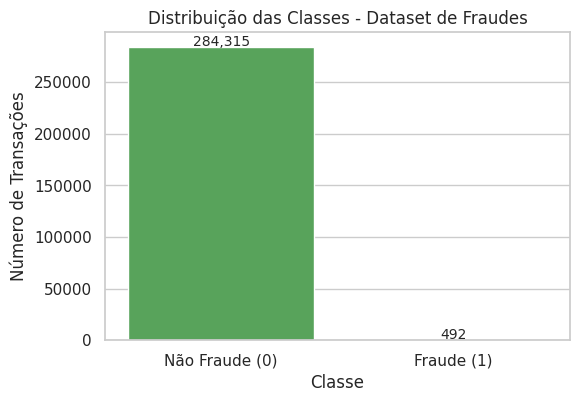

📊 Proporção das Classes:
Não Fraude (0): 99.8273%
Fraude (1): 0.1727%


In [ ]:
counts = df['Class'].value_counts().sort_index()
labels = ['Não Fraude (0)', 'Fraude (1)']

plt.figure(figsize=(6,4))
sns.barplot(x=labels, y=counts.values, palette=['#4CAF50', '#F44336'])
plt.title("Distribuição das Classes - Dataset de Fraudes")
plt.ylabel("Número de Transações")
plt.xlabel("Classe")
for i, val in enumerate(counts.values):
    plt.text(i, val + 500, f"{val:,}", ha='center', fontsize=10)
plt.show()

print("📊 Proporção das Classes:")
for label, val in zip(labels, counts.values):
    print(f"{label}: {val/df.shape[0]*100:.4f}%")

### 📝 Resumo Técnico Automático
_____________________________________________

Ao final do notebook foi gerado um resumo técnico automático que reúne os principais pontos do experimento: os parâmetros do melhor modelo identificado, métricas de treino e teste, comparação entre abordagens e recomendações operacionais.

In [ ]:
print("\n===================== 📌 RESUMO TÉCNICO =====================")
print(f"Melhor modelo inicial: Random Forest otimizado {grid.best_params_}")
print(f"Acurácia treino: {train_score_rf:.4f}")
print(f"Acurácia teste:  {test_score_rf:.4f}")
print(f"F1-score final:  {f1_score(y_test, y_pred_best):.4f}")
print(f"ROC-AUC final:   {roc_auc_score(y_test, y_proba_best):.4f}")
print("-------------------------------------------------------------")
print("Melhor threshold encontrado:", round(best_threshold, 4))
print("F1 com threshold ajustado:", round(f1_score(y_test, y_pred_thresh), 4))
print("F1 com SMOTE:", round(f1_score(y_test, y_pred_smote), 4))
print("-------------------------------------------------------------")
print("Observações automáticas:")
print("- O dataset é fortemente desbalanceado.")
print("- O uso de SMOTE e ajuste de threshold aumentou o recall e F1 da classe minoritária.")
print("- Métricas mais adequadas: F1-score e ROC-AUC.")
print("- Foi feita validação cruzada, ajuste de hiperparâmetros, balanceamento e avaliação avançada.")
print("=============================================================")


===================== 📌 RESUMO TÉCNICO =====================
Melhor modelo inicial: Random Forest otimizado {'clf__max_depth': None, 'clf__n_estimators': 50}
Acurácia treino: 1.0000
Acurácia teste:  0.9995
F1-score final:  0.6093
ROC-AUC final:   0.9428
-------------------------------------------------------------
Melhor threshold encontrado: 0.2
F1 com threshold ajustado: 0.7957
F1 com SMOTE: 0.8265
-------------------------------------------------------------
Observações automáticas:
- O dataset é fortemente desbalanceado.
- O uso de SMOTE e ajuste de threshold aumentou o recall e F1 da classe minoritária.
- Métricas mais adequadas: F1-score e ROC-AUC.
- Foi feita validação cruzada, ajuste de hiperparâmetros, balanceamento e avaliação avançada.


### 💾 Salvando o modelo final
_____________________________________________________________
Por fim, o notebook incluiu a etapa de serialização do modelo final para uso posterior em produção ou reavaliação.

In [ ]:
import joblib
joblib.dump(best_model, 'best_model_creditcard_rf.pkl')
print("\n✅ Modelo final salvo como: best_model_creditcard_rf.pkl")



✅ Modelo final salvo como: best_model_creditcard_rf.pkl
